# This is a notebook of the lessons for machine leaning

In [1]:
import pandas as pd

In [2]:
data = {'ages': [14, 16, 18],
        'height': [35, 63, 64]}

In [3]:
index = ['James', 'Bob', 'Amy']
df = pd.DataFrame(data, index=index)
df

,ages,height
James,14,35
Bob,16,63
Amy,18,64


In [4]:
df.loc['Bob']

ages      16
height    63
Name: Bob, dtype: int64

## The lesson two - task regression

In [5]:
import numpy as np
import pandas as pd

In [6]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # for drow 3d proection

matplotlib.rc('font', size=18) # for grow up font in the plot

In [7]:
# load data
houses = pd.read_csv('1.4_houses.csv')

In [8]:
houses.head(7)

,dim_1,dim_2,level,price
0,29,28,luxury,2212.0
1,28,29,luxury,2203.0
2,6,9,basic,254.0
3,5,9,basic,242.0
4,6,6,basic,195.0
5,5,8,basic,200.0
6,27,29,luxury,2108.0


<function matplotlib.pyplot.show(close=None, block=None)>

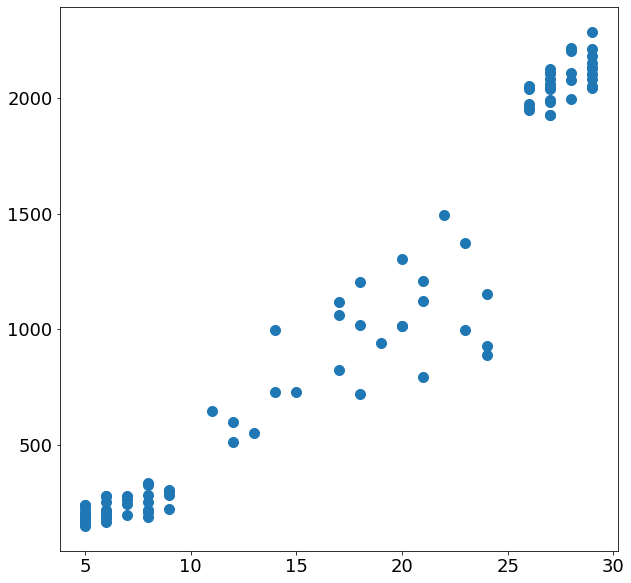

In [9]:
fig = plt.figure(figsize=(10, 10)) # create figure
ax = plt.axes()

# substitute point on the plot
ax.scatter(houses['dim_1'], houses['price'], s=100) # s  - size markers
plt.show

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
X = houses[['dim_1']]
y = houses['price']

In [12]:
# create regressor, learn model
reg = LinearRegression().fit(X, y)

In [13]:
[a] = reg.coef_
a

83.08870108821485

In [14]:
b = reg.intercept_
b

-351.68469784672334

In [15]:
def reg_prediction(dim_1):
    return a*dim_1 + b

In [16]:
# check manual function prediction
reg_prediction(X.dim_1[0])

2057.887633711507

In [17]:
# check built-in prediction in sklearn
y_prediction = reg.predict(X[0:])
y_prediction

array([2057.88763371, 1974.79893262,  146.84750868,   63.75880759,
        146.84750868,   63.75880759, 1891.71023154, 1559.35542718,
        396.11361195, 2057.88763371, 2057.88763371, 2057.88763371,
         63.75880759, 1393.17802501, 2057.88763371,  313.02491086,
       1891.71023154, 1808.62153045,  894.64581848, 1559.35542718,
       1808.62153045,  229.93620977,  313.02491086,  645.37971521,
        313.02491086, 1891.71023154, 1891.71023154,  313.02491086,
       1393.17802501, 1891.71023154,  396.11361195, 1974.79893262,
       1310.08932392,  313.02491086,  229.93620977,  562.29101412,
        146.84750868,  396.11361195, 1143.91192174,  146.84750868,
        146.84750868, 2057.88763371, 1974.79893262,  229.93620977,
         63.75880759,   63.75880759,   63.75880759, 1476.26672609,
        146.84750868,   63.75880759, 1642.44412827,  811.55711739,
         63.75880759, 2057.88763371,  728.4684163 , 1060.82322065,
       1143.91192174,   63.75880759, 1808.62153045,  146.84750

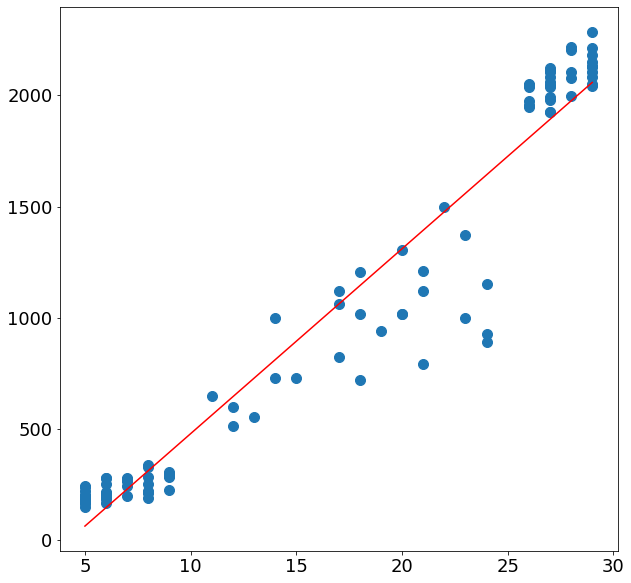

In [18]:
# drow line regression on the plot

fig = plt.figure(figsize=(10, 10))
ax = plt.axes()

ax.scatter(houses['dim_1'], houses['price'], s=100)
ax.plot([X.dim_1.min(), X.dim_1.max()], [y_prediction.min(), y_prediction.max()], c='red' )

## Now, Will be able to do for two coefficients

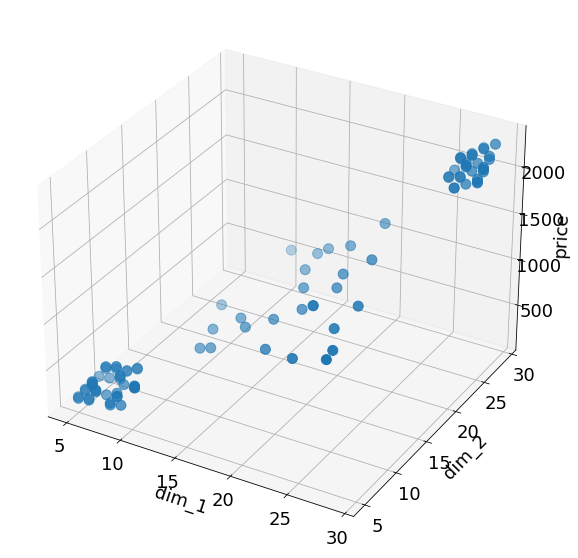

In [19]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')

ax.scatter(houses['dim_1'], houses['dim_2'], houses['price'], s=100)

ax.set_xlabel('dim_1')
ax.set_ylabel('dim_2')
ax.set_zlabel('price')

plt.show()

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
X = houses[['dim_1', 'dim_2']]
Y = houses['price']

In [22]:
reg = LinearRegression().fit(X, Y)
[a1, a2] = reg.coef_
b = reg.intercept_

In [23]:
def reg_line_predict(dim_1, dim_2):
    return a1 * dim_1 + a2 * dim_2 + b

In [24]:
reg_line_predict(X['dim_1'][0], X['dim_1'][1])

2080.82359179565

In [25]:
reg.predict(X[0:1])[0]

2080.82359179565

In [26]:
d1, d2 = list(), list()
for x in np.linspace(min(houses['dim_1']), max(houses['dim_1']), num=100):
    for y in np.linspace(min(houses['dim_2']), max(houses['dim_2']), num=100):
        d1.append(x)
        d2.append(y)
d1 = np.array(d1).reshape(-1, 1)
d2 = np.array(d2).reshape(-1, 1)
p = reg.predict(np.concatenate([d1, d2], axis=1))

/home/stynic/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


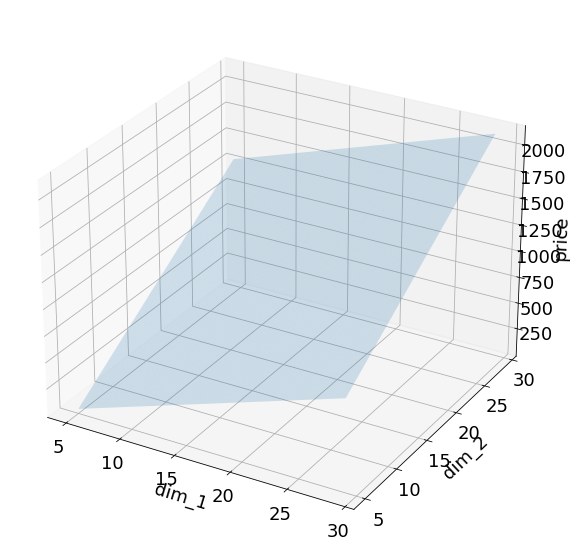

In [27]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.plot_trisurf(d1.ravel(), d2.ravel(), p.ravel(), alpha=0.2)

ax.set_xlabel('dim_1')
ax.set_ylabel('dim_2')
ax.set_zlabel('price')

ax.elev = 27
plt.show()

## The lesson 5 of module 1 by ML: Learn with teacher: classification

In [28]:
import numpy as np
import pandas as pd

In [29]:
houses = pd.read_csv('1.4_houses.csv')

In [30]:
houses.head(10)

,dim_1,dim_2,level,price
0,29,28,luxury,2212.0
1,28,29,luxury,2203.0
2,6,9,basic,254.0
3,5,9,basic,242.0
4,6,6,basic,195.0
5,5,8,basic,200.0
6,27,29,luxury,2108.0
7,23,14,medium,998.0
8,9,5,basic,225.0
9,29,26,luxury,2052.0


In [31]:
houses.describe()

,dim_1,dim_2,price
count,100.000000,100.000000,100.000000
mean,16.400000,16.110000,1010.970000
std,9.340906,9.105326,801.572879
min,5.000000,5.000000,150.000000
25%,7.000000,7.000000,244.250000
50%,17.000000,14.000000,808.000000
75%,27.000000,27.000000,1992.500000
max,29.000000,29.000000,2285.000000


In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [33]:
X = houses[['dim_1', 'dim_2']]
y = houses['level']

# create classificator
cl = DecisionTreeClassifier().fit(X,y)

In [34]:
cl.predict(X[0:1])[0], y[0]

('luxury', 'luxury')

In [35]:
# output information from tree decion for our data
print(export_text(cl))

|--- feature_1 <= 10.00
|   |--- class: basic
|--- feature_1 >  10.00
|   |--- feature_0 <= 25.00
|   |   |--- class: medium
|   |--- feature_0 >  25.00
|   |   |--- class: luxury



## The lesson 6 of module 1 by ML : clustering

In [36]:
import numpy as np
import pandas as pd
import matplotlib

In [37]:
import matplotlib.pyplot as plt

In [38]:
matplotlib.rc('font', size=18)

In [39]:
houses = pd.read_csv('1.4_houses.csv')

In [40]:
houses.head(10)

,dim_1,dim_2,level,price
0,29,28,luxury,2212.0
1,28,29,luxury,2203.0
2,6,9,basic,254.0
3,5,9,basic,242.0
4,6,6,basic,195.0
5,5,8,basic,200.0
6,27,29,luxury,2108.0
7,23,14,medium,998.0
8,9,5,basic,225.0
9,29,26,luxury,2052.0


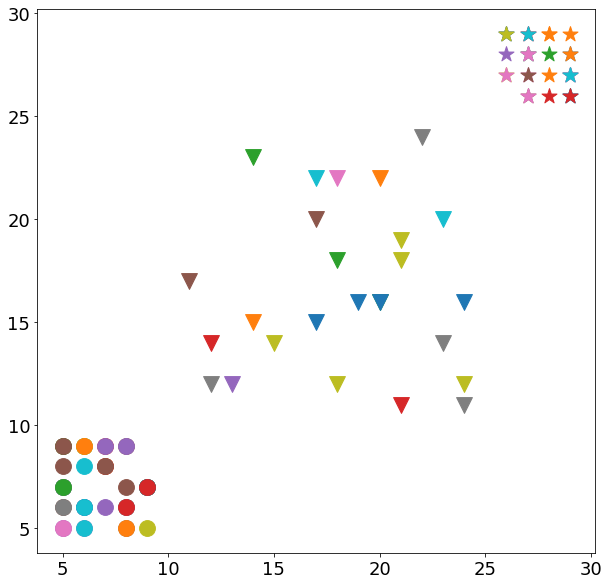

In [41]:
fig = plt.figure(figsize=(10, 10))

markers = {"basic": "o", "medium": "v", "luxury": "*"}
for d1, d2, l in zip(houses.dim_1, houses.dim_2, houses.level):
    plt.scatter(d1, d2, s=250, marker=markers[l])
    
plt.show()

In [42]:
from sklearn.cluster import KMeans

In [43]:
X = houses[['dim_1', 'dim_2']]

clust = KMeans(n_clusters=3).fit(X)

In [44]:
clust.cluster_centers_

array([[18.5       , 16.45833333],
       [27.42424242, 27.51515152],
       [ 6.76744186,  7.1627907 ]])

In [45]:
c1, c2, c3 = clust.cluster_centers_

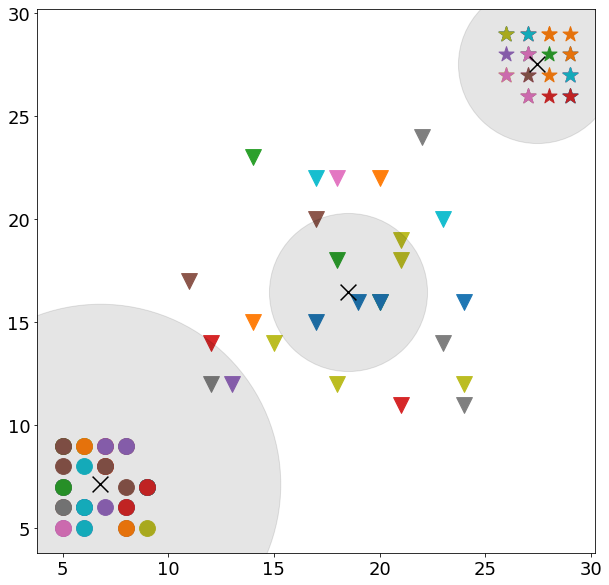

In [46]:
fig = plt.figure(figsize=(10, 10))

markers = {"basic": "o", "medium": "v", "luxury": "*"}
for d1, d2, l in zip(houses.dim_1, houses.dim_2, houses.level):
    plt.scatter(d1, d2, s=250, marker=markers[l])
    
plt.scatter(c1[0], c1[1], s=250, marker='x', c='black')
plt.scatter(c1[0], c1[1], s=250 * 1e2, c='black', alpha=0.1)

plt.scatter(c2[0], c2[1], s=250, marker='x', c='black')
plt.scatter(c2[0], c2[1], s=250 * 1e2, c='black', alpha=0.1)

plt.scatter(c3[0], c3[1], s=250, marker='x', c='black')
plt.scatter(c3[0], c3[1], s=250 * 5.2e2, c='black', alpha=0.1)

## homework by module 1: Introduction machine leaning

In [47]:
# import all needed library for work
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [48]:
phones = pd.read_csv('1.8_phones.csv')

In [49]:
phones.head(17)

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013
5,512,iOS,15842,2018
6,128,Android,7191,2015
7,64,Android,4277,2013
8,512,iOS,12797,2015
9,64,Android,6256,2015


In [50]:
phones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   disk    100 non-null    int64 
 1   os      100 non-null    object
 2   price   100 non-null    int64 
 3   year    100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.2+ KB


In [51]:
matplotlib.rc('font', size=18)

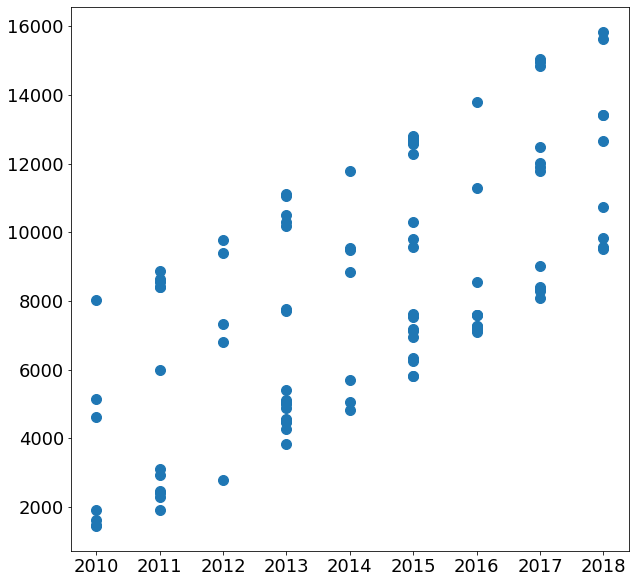

In [52]:
plt.figure(figsize=(10, 10))
ax = plt.axes()

ax.scatter(phones['year'], phones['price'], s=100)

In [53]:
X = phones[['disk', 'year']]
y = phones['price']

## taks one - learn model regression

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
reg = LinearRegression().fit(X, y)

In [56]:
reg.predict(X[:1])[0], y[:1][0]

(7848.046694419114, 7256)

In [57]:
X

,disk,year
0,64,2016
1,128,2015
2,64,2010
3,512,2017
4,16,2013
...,...,...
95,512,2011
96,64,2016
97,32,2014
98,32,2016


In [58]:
from sympy import *

In [59]:
X_M = Matrix(X)

In [60]:
b_v = Matrix(y)

In [61]:
clr = ((X_M.T * X_M)**-1)*X_M.T * b_v
clr

Matrix([
[1223704873512241/94307427733232],
[   15494916721561/5894214233327]])

In [62]:
a1, a2 = symbols('a1, a2')
flinereg = a1 * clr[0] + a2 * clr[1]
flinereg

1223704873512241*a1/94307427733232 + 15494916721561*a2/5894214233327

In [63]:
int(flinereg.subs({a1:X[0:2].disk[1] , a2:X[0:2].year[1]}))

6957

## task 2 - learn model Classifier

In [64]:
phones.head(10)

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013
5,512,iOS,15842,2018
6,128,Android,7191,2015
7,64,Android,4277,2013
8,512,iOS,12797,2015
9,64,Android,6256,2015


In [65]:
X = phones[['disk']]
y = phones['os']

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [67]:
cl = DecisionTreeClassifier().fit(X,y)

In [68]:
cl.predict(X[0:10])

array(['Android', 'Android', 'Android', 'iOS', 'Android', 'iOS',
       'Android', 'Android', 'iOS', 'Android'], dtype=object)

In [69]:
print(export_text(cl))

|--- feature_0 <= 192.00
|   |--- class: Android
|--- feature_0 >  192.00
|   |--- class: iOS



### task 3 - cluster learning

In [70]:
from sklearn.cluster import KMeans

In [71]:
phones.head(10)

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013
5,512,iOS,15842,2018
6,128,Android,7191,2015
7,64,Android,4277,2013
8,512,iOS,12797,2015
9,64,Android,6256,2015


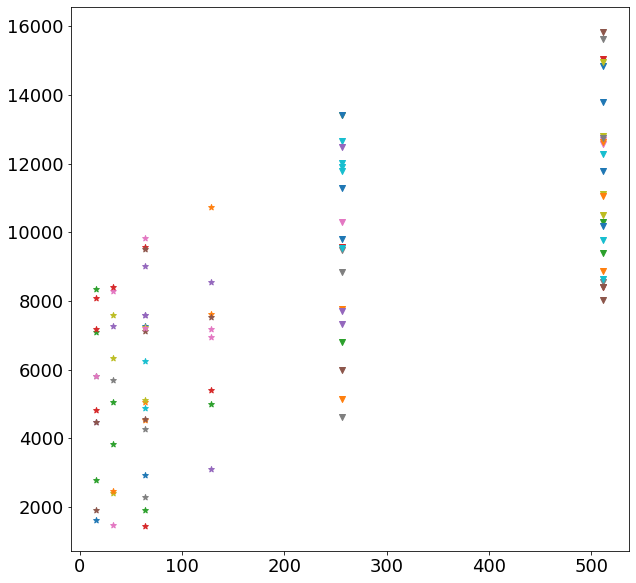

In [72]:
plt.figure(figsize=(10, 10))
ax = plt.axes()

markers = {'Android': '*', 'iOS': 'v'}
for disk, price, os in zip(phones.disk, phones.price, phones.os):
    ax.scatter(disk, price, marker=markers[os])

In [73]:
X = phones[['disk', 'price']]
cluster_model = KMeans(n_clusters=2).fit(X)

In [74]:
centr = cluster_model.cluster_centers_

In [89]:
cluster_model.predict(X[0:10]), y[0:10]

(array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0], dtype=int32),
 0    Android
 1    Android
 2    Android
 3        iOS
 4    Android
 5        iOS
 6    Android
 7    Android
 8        iOS
 9    Android
 Name: os, dtype: object)

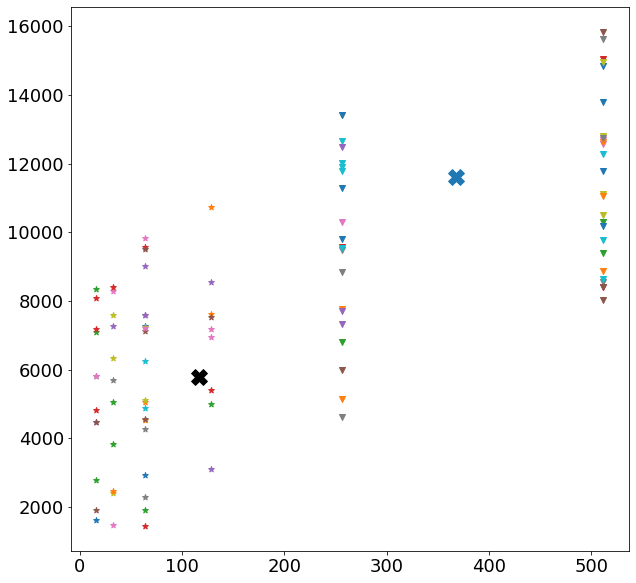

In [86]:
plt.figure(figsize=(10, 10))
ax = plt.axes()

markers = {'Android': '*', 'iOS': 'v'}
for disk, price, os in zip(phones.disk, phones.price, phones.os):
    ax.scatter(disk, price, marker=markers[os])
    
ax.scatter(centr[0][0], centr[0][1], marker='X', s=250, c='black')
ax.scatter(centr[1][0], centr[1][1], marker='X', s=250)

## some train with linear model and regularization

In [149]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

from sklearn.decomposition import PCA

In [143]:
data = pd.read_csv('1.4_houses.csv')
X = data.drop(columns=['price'])
y = data['price']
X['level'].unique()
X['level'].replace(['basic', 'medium', 'luxury'], [0, 1, 2], inplace=True)
X = X[['dim_1', 'dim_2']]
x_train, x_test , y_train, y_test = train_test_split(X, y, random_state=17)

# prices = [100, 200, 300, 500]
# X = pd.DataFrame({'price':prices})
# y = pd.Series([1, 2, 3, 5])
# x_train, x_test , y_train, y_test = train_test_split(X, y, random_state=17)

In [144]:
linear_reg = LinearRegression().fit(x_train, y_train)
linearn_ridge = Ridge(alpha=1).fit(x_train, y_train)
linearn_lasso = Lasso(alpha=1).fit(x_train, y_train)

In [145]:
print(f'{linear_reg.coef_=}')
print(f'{linearn_ridge.coef_=}')
print(f'{linearn_lasso.coef_=}')

linear_reg.coef_=array([31.72865323, 56.8051705 ])
linearn_ridge.coef_=array([31.75218161, 56.77363632])
linearn_lasso.coef_=array([31.75477294, 56.76824297])


In [146]:
rmse_linear = mean_squared_error(y_test, linear_reg.predict(x_test), squared=False)
rmse_ridge = mean_squared_error(y_test, linearn_ridge.predict(x_test), squared=False)
rmse_lasso = mean_squared_error(y_test, linearn_lasso.predict(x_test), squared=False)
print(f'{rmse_linear=}')
print(f'{rmse_ridge=}')
print(f'{rmse_lasso=}')

rmse_linear=103.93707551789356
rmse_ridge=103.8898308242964
rmse_lasso=103.88028057000648


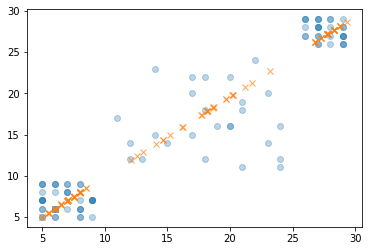

In [163]:
pca = PCA(n_components=1).fit(X)
X_pca = pca.transform(X)
X_new = pca.inverse_transform(X_pca)

plt.plot(X.iloc[:,0], X.iloc[:, 1], 'o', alpha=0.3)
plt.plot(X_new[:,0], X_new[:, 1], 'x', alpha=0.7)

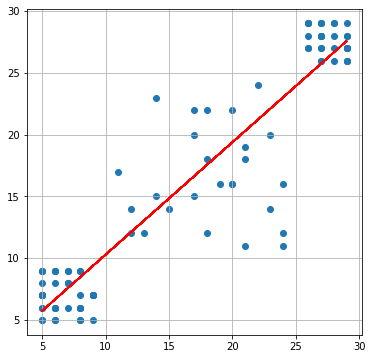

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [2] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


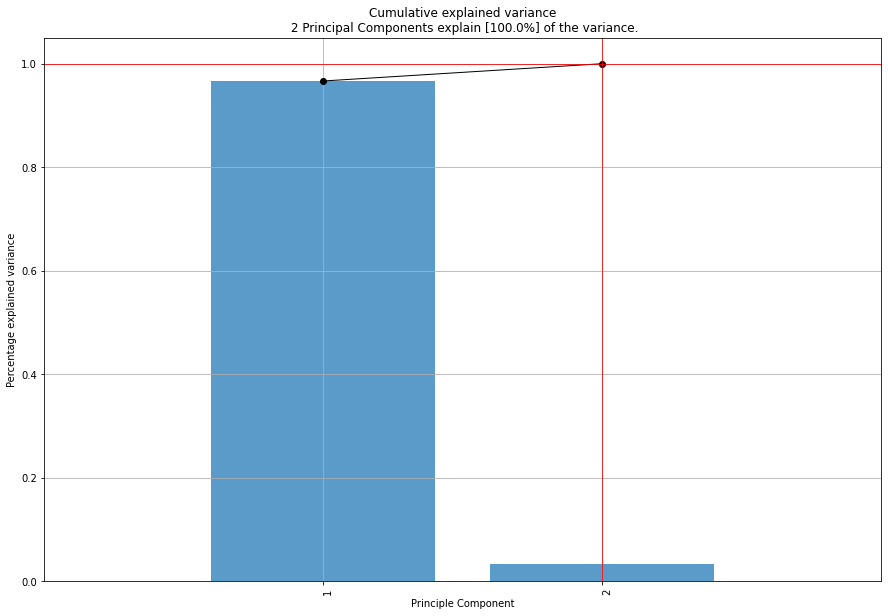

[pca] >Plot PC1 vs PC2 with loadings.


<Figure size 432x288 with 0 Axes>

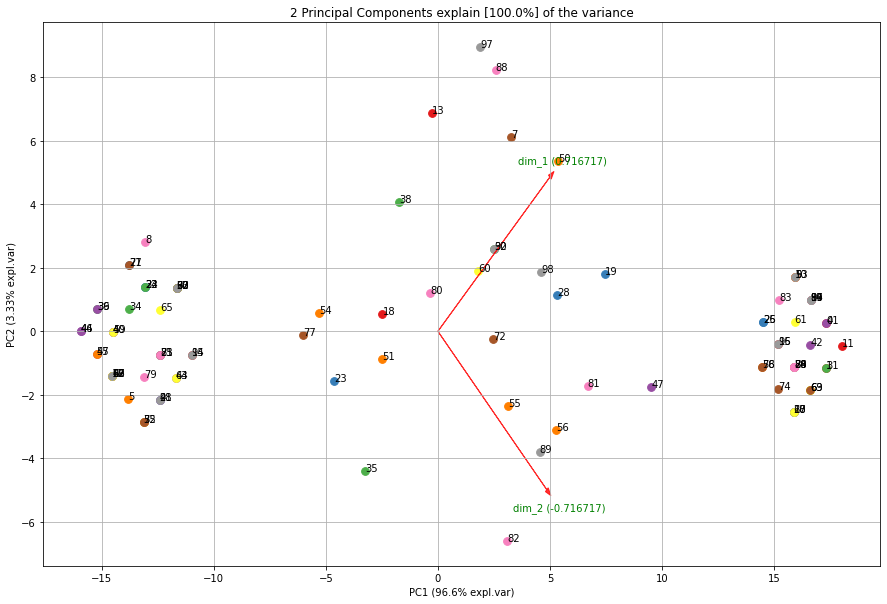

In [171]:
import numpy as np
from pca import pca
import matplotlib.pyplot as plt

# рисуем диаграмму рассеивания 
plt.figure(figsize=(6, 6))
plt.scatter(X.iloc[:,0], X.iloc[:, 1])

# добавляем регрессионную прямую
b1, b0 = np.polyfit(X.iloc[:, 0], X.iloc[:, 1], 1)
#  b0 - intercept, b1 - slope
plt.plot(X.iloc[:, 0], b0 + b1*X.iloc[:, 0], color='red')
plt.grid()
plt.show()
# настраиваем модель с 2-мя компонентами
model = pca(n_components=2)
results = model.fit_transform(X)

# столбчатая диаграмма
fig, ax = model.plot()

# диаграмма рассеивания с новыми координатами
fig, ax = model.biplot(n_feat=4, legend=False)
plt.show()